# <font color = brown> Group Members

### <font color = red> Ardra
    
### <font color = red> Jerry
    
### <font color = red> Princy
    
### <font color = red> Sreejayan
    
### <font color = red> Sruthy
    
### <font color = red> Thoufira

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_excel(r"D:\ICTAK\E-commerce.xlsx")

In [3]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [4]:
data.shape

(2025, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   server_time      2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2022 non-null   float64       
 3   session_id       2024 non-null   float64       
 4   item_id          2023 non-null   float64       
 5   item_price       2024 non-null   float64       
 6   category         2019 non-null   float64       
 7   product_type     2024 non-null   float64       
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2024 non-null   float64       
 10  os_version       2016 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 205.8+ KB


In [6]:
data.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2022.000000,2.024000e+03,2023.000000,2024.000000,2019.000000,2024.000000,2024.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63505.154721,6661.115119,10.290738,5359.607213,244.741107,0.342222,0.049877
std,26401.598808,3.108620e+05,36830.177344,17296.372880,4.961514,3076.114288,124.477650,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33845.500000,1465.000000,7.000000,2758.750000,190.000000,0.000000,0.000000
50%,46248.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,0.000000,0.000000
75%,69375.500000,7.996875e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


In [7]:
data.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

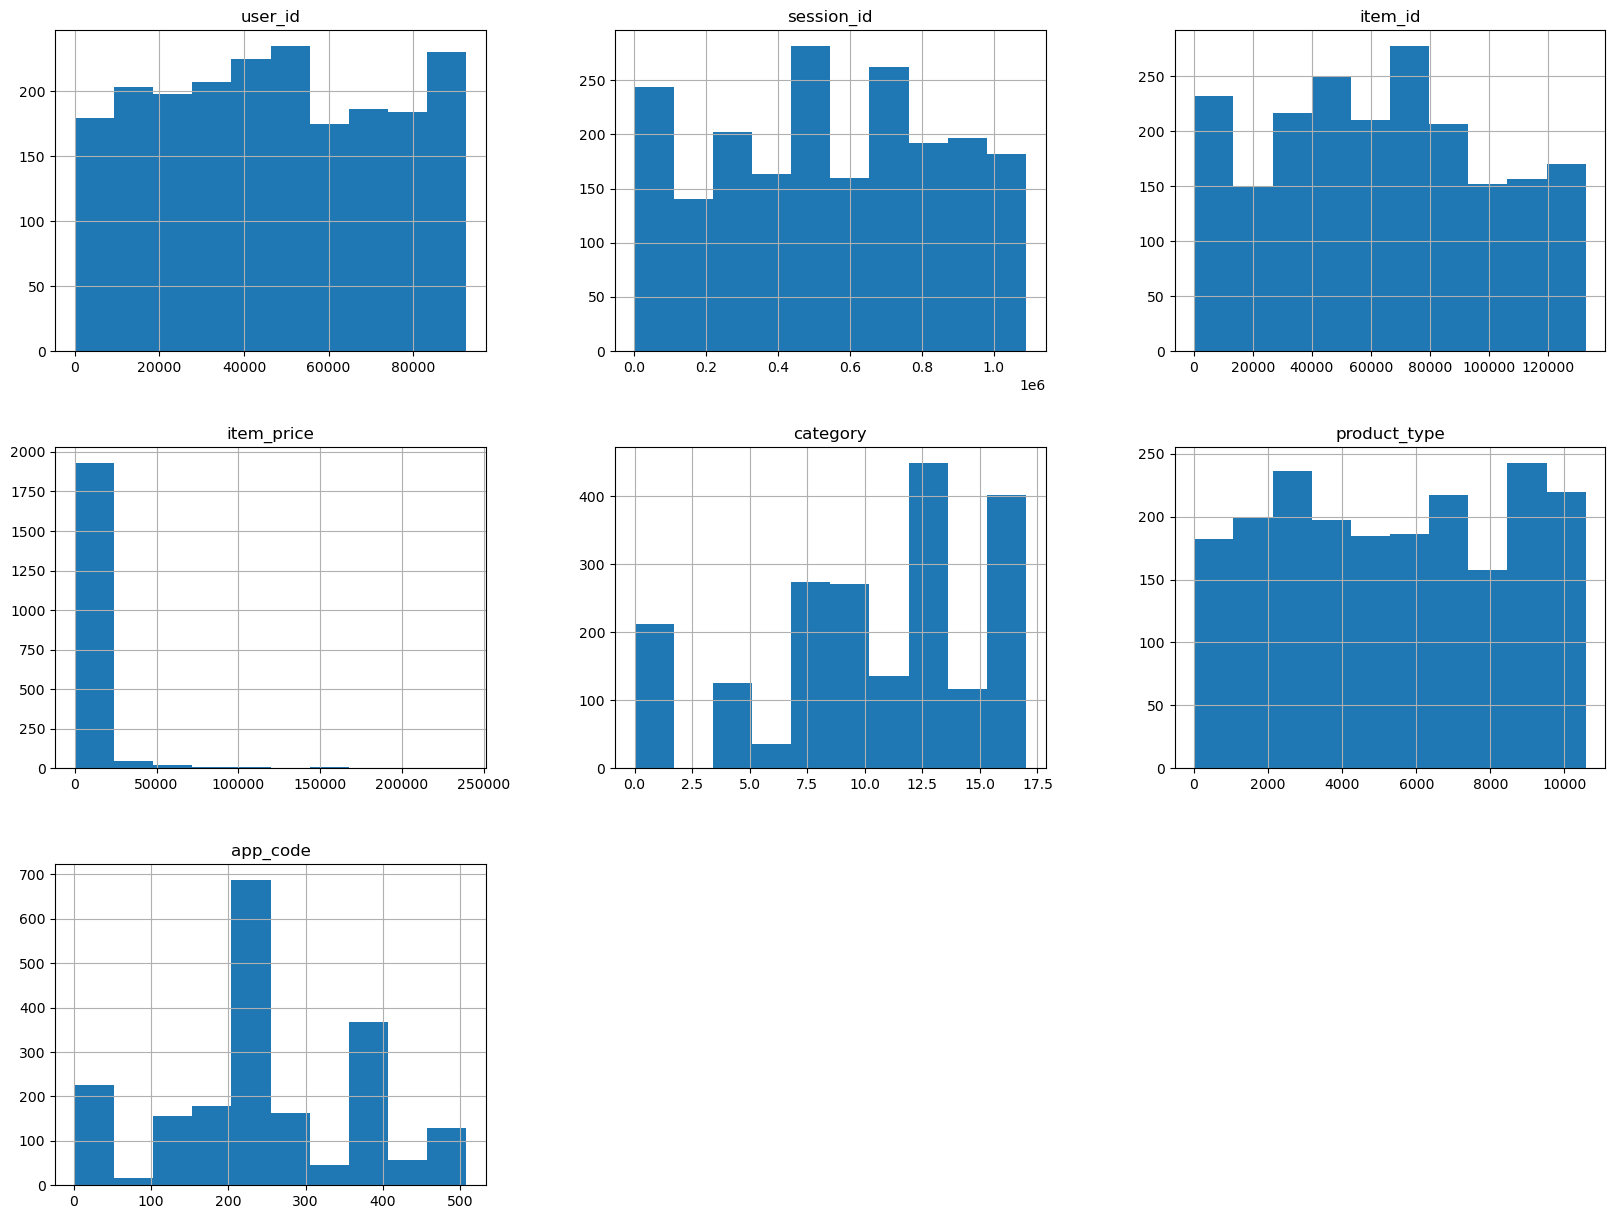

In [8]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
data.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [10]:
for col in ['user_id', 'session_id', 'item_id','product_type','app_code']:
    data[col] = data[col].fillna(data[col].mean())

In [11]:
for i in ['item_price', 'category']:
    data[i] = data[i].fillna(data[i].median())

In [12]:
data['os_version'] = data['os_version'].fillna(data['os_version'].mode())

In [13]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         9
is_4G              0
is_click           0
dtype: int64

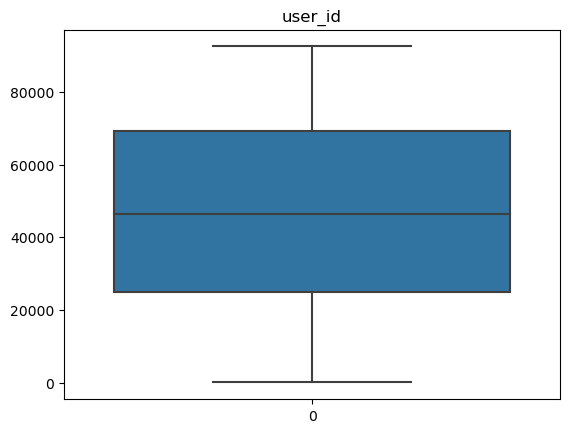

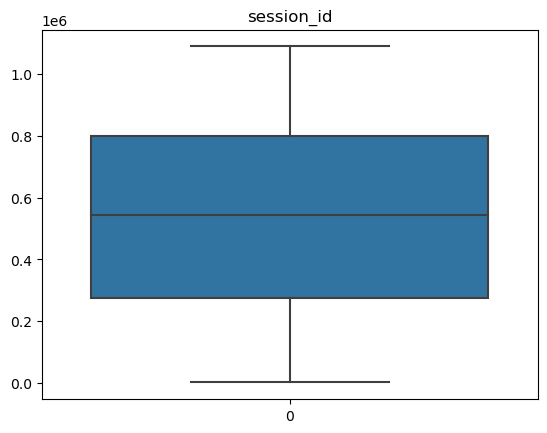

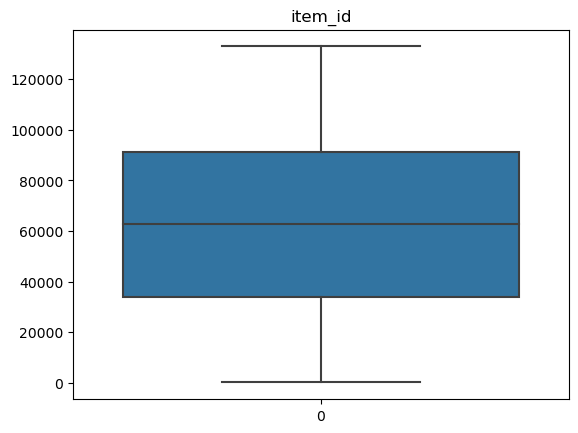

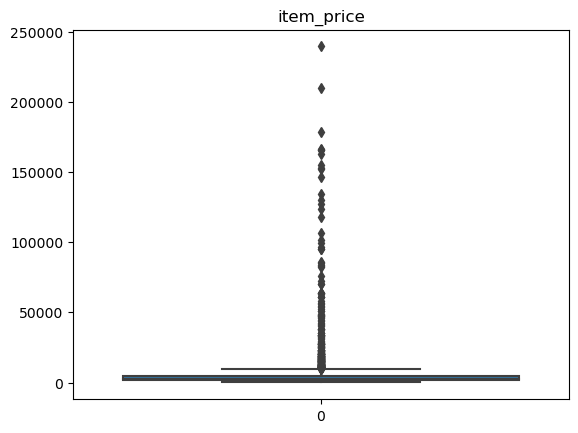

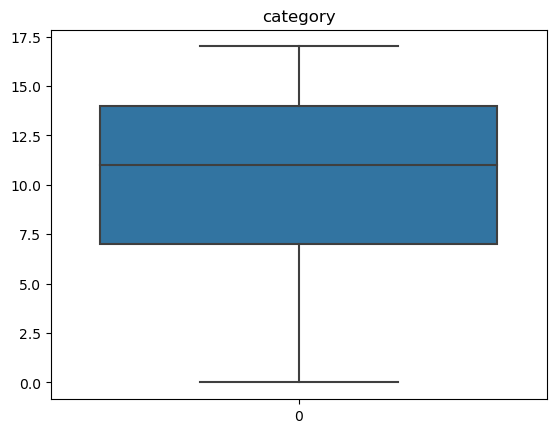

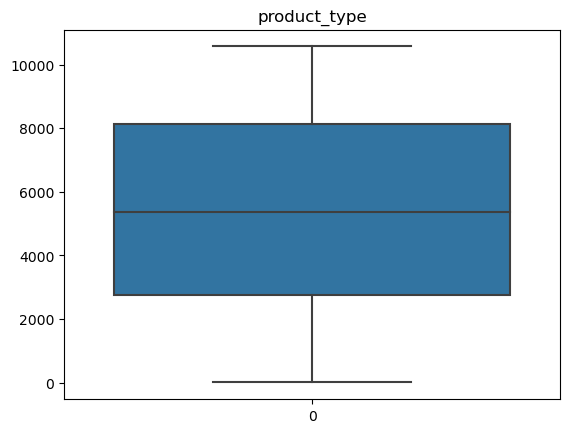

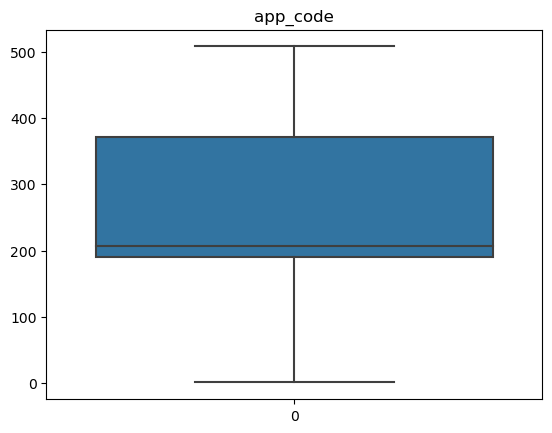

In [14]:
for i in data.columns:
    if data[i].dtype == float:
        plt.figure()
        sns.boxplot(data[i])
        plt.title(i)
        plt.show()

#### Here we can see that there is outliers in the column 'item_price'.

In [15]:
Q1 = np.percentile(data['item_price'],25,method='midpoint')
Q2 = np.percentile(data['item_price'],50,method='midpoint')
Q3 = np.percentile(data['item_price'],75,method='midpoint')

In [16]:
print(Q1)
print(Q2)
print(Q3)

1465.0
2425.0
4793.0


In [17]:
IQR = Q3 - Q1
IQR

3328.0

In [18]:
up_lim = Q3 + 1.5 * IQR
up_lim

9785.0

In [19]:
low_lim = Q1 - 1.5 * IQR
low_lim

-3527.0

#### We can see that there are no outliers below 0. So we need to find the outliersabove the upper limit. 

In [20]:
outliers = []
for x in data['item_price']:
    if(x > up_lim) or (x<low_lim):
        outliers.append(x)

In [21]:
outliers

[18118.0,
 17856.0,
 17222.0,
 11462.0,
 10246.0,
 23040.0,
 10822.0,
 10816.0,
 11712.0,
 12221.0,
 46656.0,
 20492.0,
 85760.0,
 9990.0,
 54336.0,
 15296.0,
 13984.0,
 33984.0,
 13420.0,
 19526.0,
 51136.0,
 9959.0,
 10758.0,
 10886.0,
 25472.0,
 35136.0,
 11404.0,
 11456.0,
 99507.0,
 12280.0,
 53625.0,
 18668.0,
 22208.0,
 21409.0,
 83776.0,
 14906.0,
 18557.0,
 130154.0,
 20416.0,
 14080.0,
 117849.0,
 17222.0,
 178099.0,
 165665.0,
 11369.0,
 32576.0,
 10240.0,
 14016.0,
 41369.0,
 16416.0,
 63936.0,
 10087.0,
 10310.0,
 12096.0,
 10298.0,
 21120.0,
 26956.0,
 13000.0,
 16960.0,
 152652.0,
 16128.0,
 47936.0,
 10039.0,
 19008.0,
 9792.0,
 27545.0,
 20160.0,
 10310.0,
 18278.0,
 165665.0,
 96768.0,
 10816.0,
 14656.0,
 64000.0,
 37916.0,
 70336.0,
 27400.0,
 24969.0,
 15808.0,
 15296.0,
 40256.0,
 12672.0,
 49016.0,
 61056.0,
 15968.0,
 22348.0,
 17665.0,
 22912.0,
 16265.0,
 47360.0,
 20428.0,
 12736.0,
 21248.0,
 11392.0,
 32808.0,
 27443.0,
 10771.0,
 10944.0,
 11008.0,
 17664.

In [22]:
ind = data['item_price'] > up_lim
index = data.loc[ind].index.tolist()
index

[6,
 7,
 31,
 34,
 49,
 51,
 63,
 68,
 74,
 86,
 90,
 107,
 110,
 113,
 114,
 122,
 127,
 138,
 146,
 161,
 176,
 179,
 184,
 191,
 228,
 242,
 290,
 294,
 314,
 325,
 328,
 352,
 353,
 368,
 370,
 386,
 399,
 419,
 423,
 428,
 442,
 447,
 453,
 458,
 463,
 464,
 465,
 467,
 471,
 472,
 475,
 478,
 481,
 493,
 512,
 538,
 543,
 561,
 577,
 581,
 584,
 595,
 596,
 598,
 600,
 603,
 610,
 639,
 643,
 644,
 651,
 663,
 664,
 669,
 679,
 688,
 713,
 715,
 722,
 726,
 732,
 736,
 752,
 767,
 778,
 800,
 801,
 840,
 846,
 849,
 859,
 865,
 888,
 900,
 912,
 925,
 929,
 942,
 949,
 953,
 962,
 970,
 977,
 984,
 985,
 992,
 1000,
 1013,
 1024,
 1025,
 1033,
 1035,
 1037,
 1057,
 1060,
 1063,
 1065,
 1106,
 1113,
 1121,
 1132,
 1140,
 1146,
 1151,
 1157,
 1166,
 1168,
 1182,
 1198,
 1199,
 1204,
 1206,
 1213,
 1238,
 1248,
 1257,
 1264,
 1267,
 1272,
 1278,
 1281,
 1298,
 1305,
 1320,
 1325,
 1327,
 1329,
 1342,
 1359,
 1373,
 1374,
 1376,
 1386,
 1387,
 1393,
 1396,
 1419,
 1424,
 1426,
 1432,

In [23]:
data.drop(index, inplace = True)

In [24]:
data.shape

(1780, 13)

In [25]:
data['device_type'].nunique()

1

In [26]:
data['os_version'].nunique()

3

### One Hot Encoding

In [27]:
df = pd.get_dummies(data)

In [28]:
df.shape

(1780, 15)

In [29]:
df.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,device_type_android,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,1,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,1,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,1,0,1,0


### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
df1 = data

In [33]:
df1['os_version'] = le.fit_transform(df1['os_version'])

In [34]:
df1.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,2,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,0,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,1,0,0


In [35]:
df1.drop('device_type', axis = 1, inplace = True)

In [36]:
df1.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,2,0,0
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,0,1,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,1,0,0


### Min Max Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
min_max = MinMaxScaler()

In [39]:
x = df[['item_price', 'category', 'product_type', 'app_code']]

In [40]:
x.describe()

,item_price,category,product_type,app_code
count,1780.000000,1780.000000,1780.000000,1780.000000
mean,2774.356180,10.260112,5367.817195,244.220079
std,2034.199606,4.840605,3077.228638,124.631814
min,16.000000,0.000000,8.000000,1.000000
25%,1273.000000,7.000000,2739.500000,190.000000
50%,2240.000000,11.000000,5403.000000,207.000000
75%,3713.250000,13.000000,8121.000000,371.000000
max,9780.000000,17.000000,10573.000000,508.000000


In [41]:
x1 = min_max.fit_transform(x)

#### <font color = blue> The variable will be converted into a array after scaling. So we need to convert it into dataframe.

In [42]:
x1 = pd.DataFrame(x1, columns = ['item_price', 'category', 'product_type', 'app_code'])

In [43]:
x1.describe()

,item_price,category,product_type,app_code
count,1780.000000,1780.000000,1780.000000,1780.000000
mean,0.282503,0.603536,0.507318,0.479724
std,0.208337,0.284741,0.291266,0.245822
min,0.000000,0.000000,0.000000,0.000000
25%,0.128738,0.411765,0.258542,0.372781
50%,0.227776,0.647059,0.510648,0.406312
75%,0.378661,0.764706,0.767913,0.729783
max,1.000000,1.000000,1.000000,1.000000


### Standard Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
std_scl = StandardScaler()

In [46]:
x2 = std_scl.fit_transform(x)

#### <font color = blue> The variable will be converted into a array after scaling. So we need to convert it into dataframe.

In [47]:
x2 = pd.DataFrame(x2, columns = ['item_price', 'category', 'product_type', 'app_code'])

In [48]:
x2.describe()

,item_price,category,product_type,app_code
count,1780.000000,1.780000e+03,1.780000e+03,1.780000e+03
mean,0.000000,1.097749e-16,2.604658e-16,-2.594679e-17
std,1.000281,1.000281e+00,1.000281e+00,1.000281e+00
min,-1.356372,-2.120188e+00,-1.742257e+00,-1.952057e+00
25%,-0.738265,-6.736820e-01,-8.543583e-01,-4.351643e-01
50%,-0.262760,1.528932e-01,1.143649e-02,-2.987242e-01
75%,0.461684,5.661808e-01,8.949470e-01,1.017521e+00
max,3.444899,1.392756e+00,1.691992e+00,2.117068e+00
